In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.metrics import roc_curve,roc_auc_score
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print(f'The data contains : \n Total number of rows :{df.shape[0]} \n Total number of columns :{df.shape[1]}')

The data contains : 
 Total number of rows :10000 
 Total number of columns :14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
col_val = df.columns.tolist()
col_val

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [11]:
for column in col_val:
    print(df[column].value_counts())
    print("#"*40)

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64
########################################
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
########################################
Gender
Male      5457
Female    4543
Name: count, dtype: int64
########################################
Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64
########################################
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64
########################################
Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1


# EDA

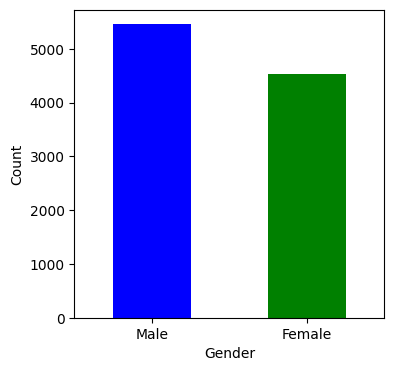

Counter({'Male': 5457, 'Female': 4543})

In [12]:
plt.figure(figsize=(4,4))
df['Gender'].value_counts().plot.bar(color=['b', 'g'])
plt.ylabel('Count')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()
Counter(df.Gender)

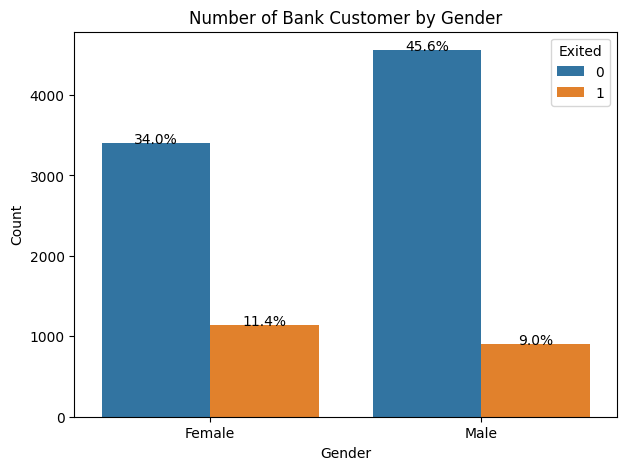

In [13]:
chart = 'Number of Bank Customer by Gender'
plt.figure(figsize=(7, 5))

ax = sns.countplot(data=df, x='Gender', hue='Exited')

total = len(df['Gender'])
for p in ax.patches:
    height = p.get_height()
    if height != 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{height/total:.1%}', ha="center")

plt.title(chart)
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

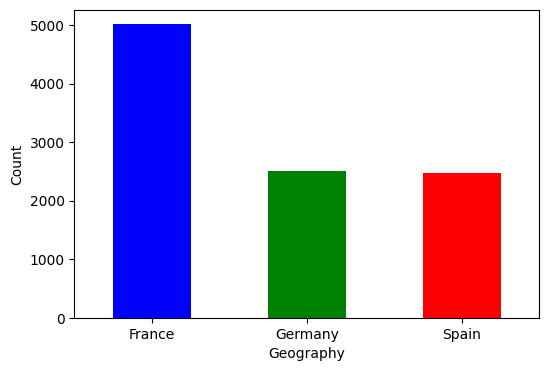

Counter({'France': 5014, 'Germany': 2509, 'Spain': 2477})

In [14]:
plt.figure(figsize=(6,4))
df['Geography'].value_counts().plot.bar(color=['b', 'g', 'r'])
plt.ylabel('Count')
plt.xlabel('Geography')
plt.xticks(rotation=0)
plt.show()
Counter(df.Geography)

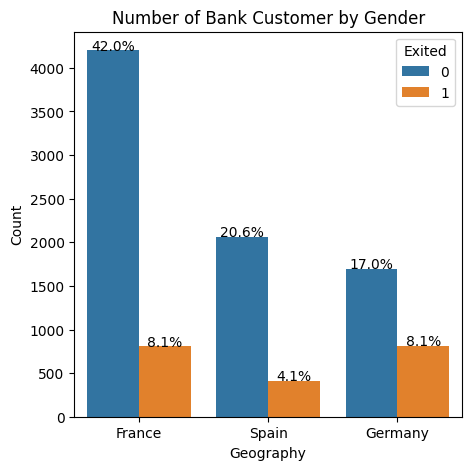

In [15]:
chart = 'Number of Bank Customer by Gender'
plt.figure(figsize=(5, 5))

ax = sns.countplot(data=df, x='Geography', hue='Exited')

total = len(df['Geography'])
for p in ax.patches:
    height = p.get_height()
    if height != 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{height/total:.1%}', ha="center")


plt.title(chart)
plt.xlabel('Geography')
plt.ylabel('Count')

# Show the plot
plt.show()

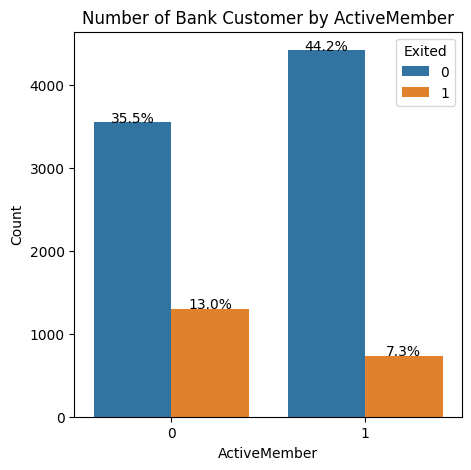

In [16]:
chart = 'Number of Bank Customer by ActiveMember'
plt.figure(figsize=(5, 5))

ax = sns.countplot(data=df, x='IsActiveMember', hue='Exited')

total = len(df['IsActiveMember'])
for p in ax.patches:
    height = p.get_height()
    if height != 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{height/total:.1%}', ha="center")


plt.title(chart)
plt.xlabel('ActiveMember')
plt.ylabel('Count')

plt.show()

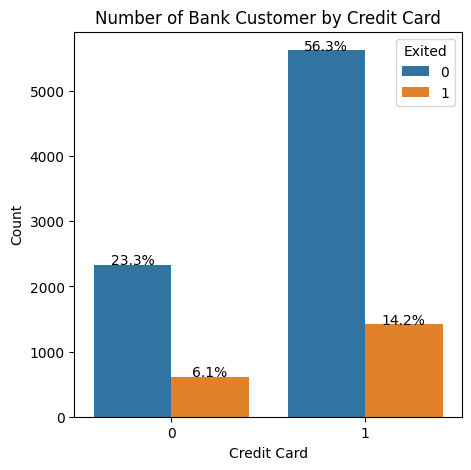

In [17]:
chart = 'Number of Bank Customer by Credit Card'
plt.figure(figsize=(5, 5))

ax = sns.countplot(data=df, x='HasCrCard', hue='Exited')

total = len(df['HasCrCard'])
for p in ax.patches:
    height = p.get_height()
    if height != 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{height/total:.1%}', ha="center")


plt.title(chart)
plt.xlabel('Credit Card')
plt.ylabel('Count')

plt.show()

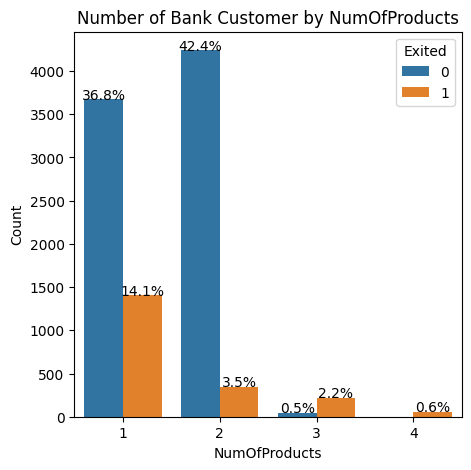

In [18]:
chart = 'Number of Bank Customer by NumOfProducts'
plt.figure(figsize=(5, 5))

ax = sns.countplot(data=df, x='NumOfProducts', hue='Exited')

total = len(df['NumOfProducts'])
for p in ax.patches:
    height = p.get_height()
    if height != 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{height/total:.1%}', ha="center")


plt.title(chart)
plt.xlabel('NumOfProducts')
plt.ylabel('Count')

plt.show()

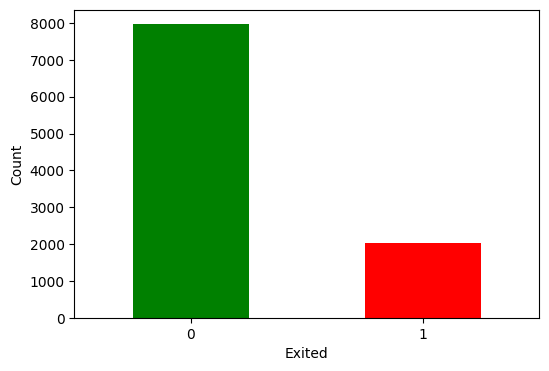

Counter({0: 7963, 1: 2037})

In [19]:
plt.figure(figsize=(6,4))
df['Exited'].value_counts().plot.bar(color=['g', 'r'])
plt.ylabel('Count')
plt.xlabel('Exited')
plt.xticks(rotation=0)
plt.show()
Counter(df.Exited)

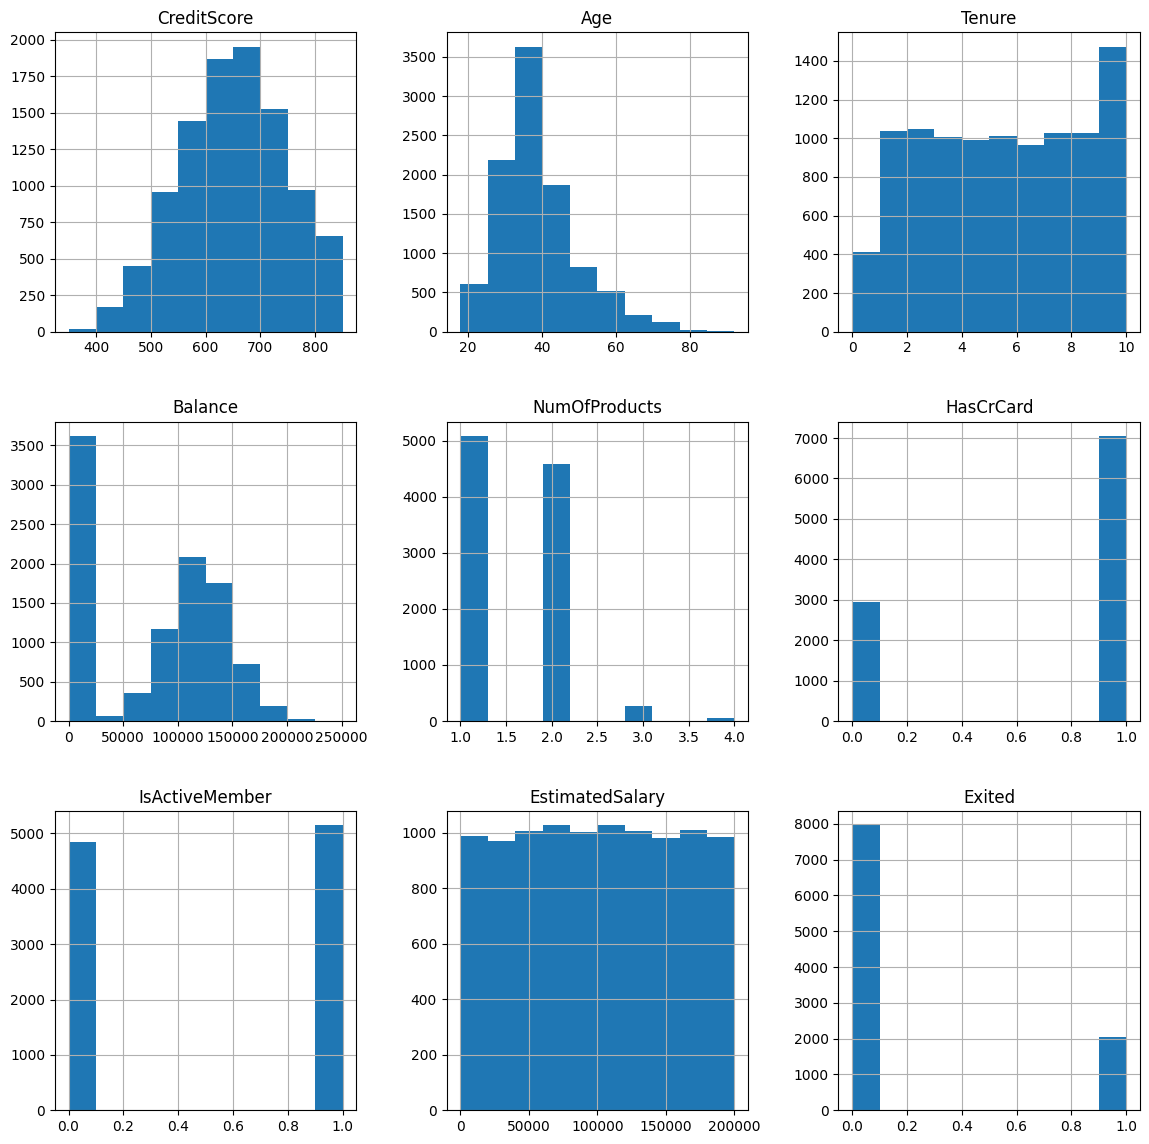

In [20]:
df.hist(figsize=(14,14))
plt.show()

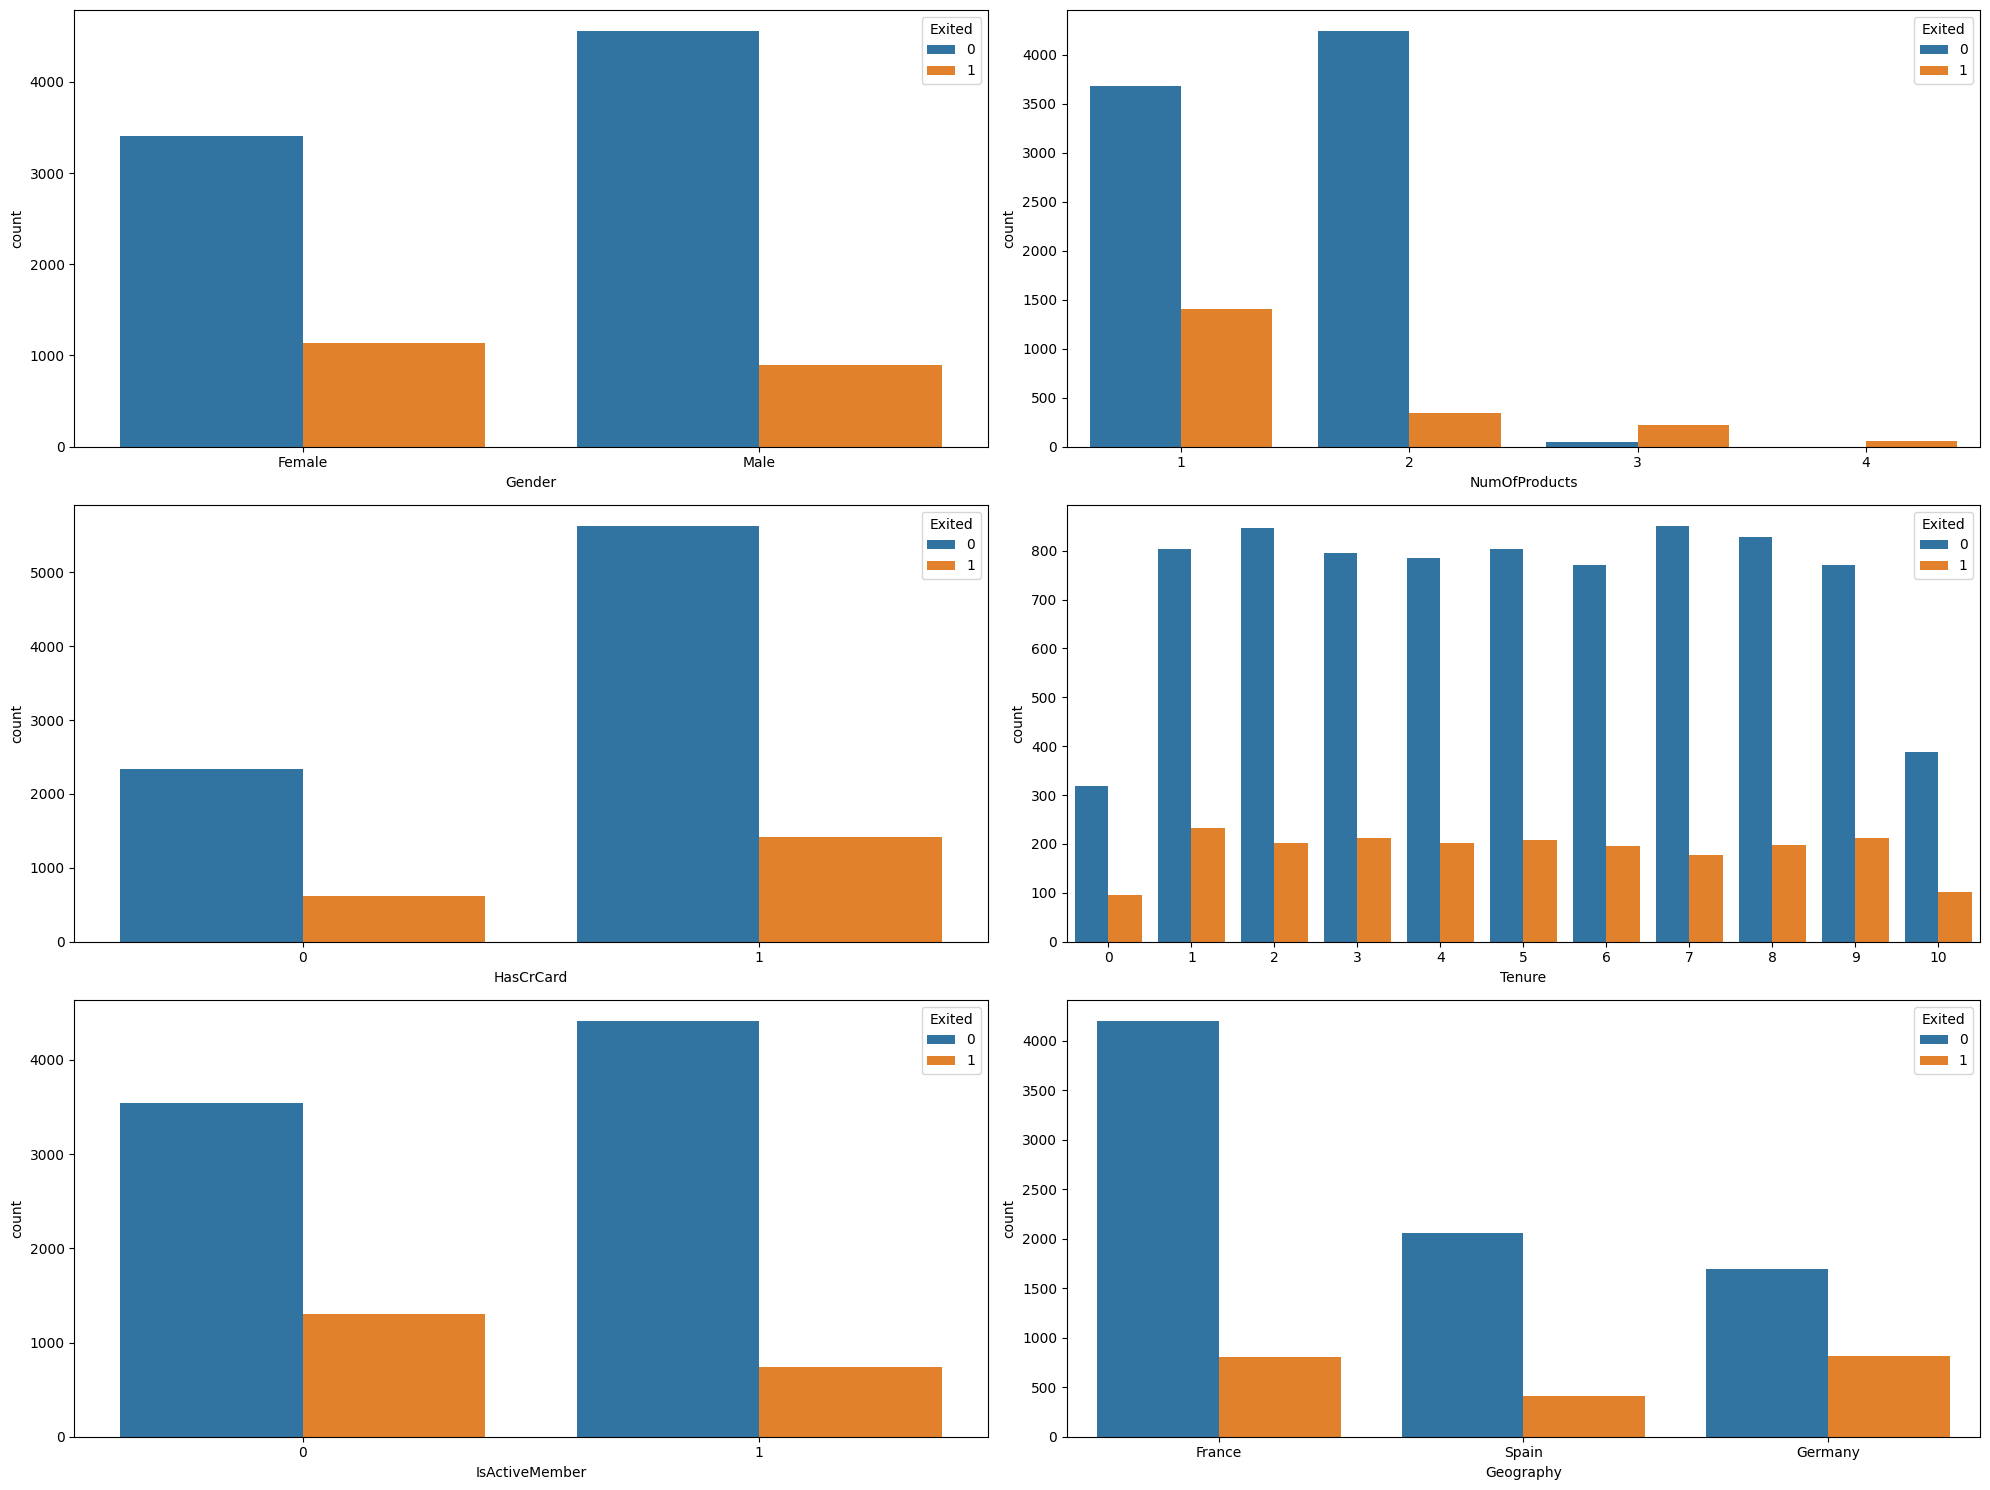

In [21]:
col_m = ['Gender','NumOfProducts','HasCrCard','Tenure','IsActiveMember','Geography']
fig,axs = plt.subplots(nrows=3,ncols=2,figsize=(20,15))
axs=axs.flatten()
for i,var in enumerate(col_m):
    sns.countplot(data=df,x=var,hue='Exited',ax=axs[i])
plt.tight_layout()
plt.show()

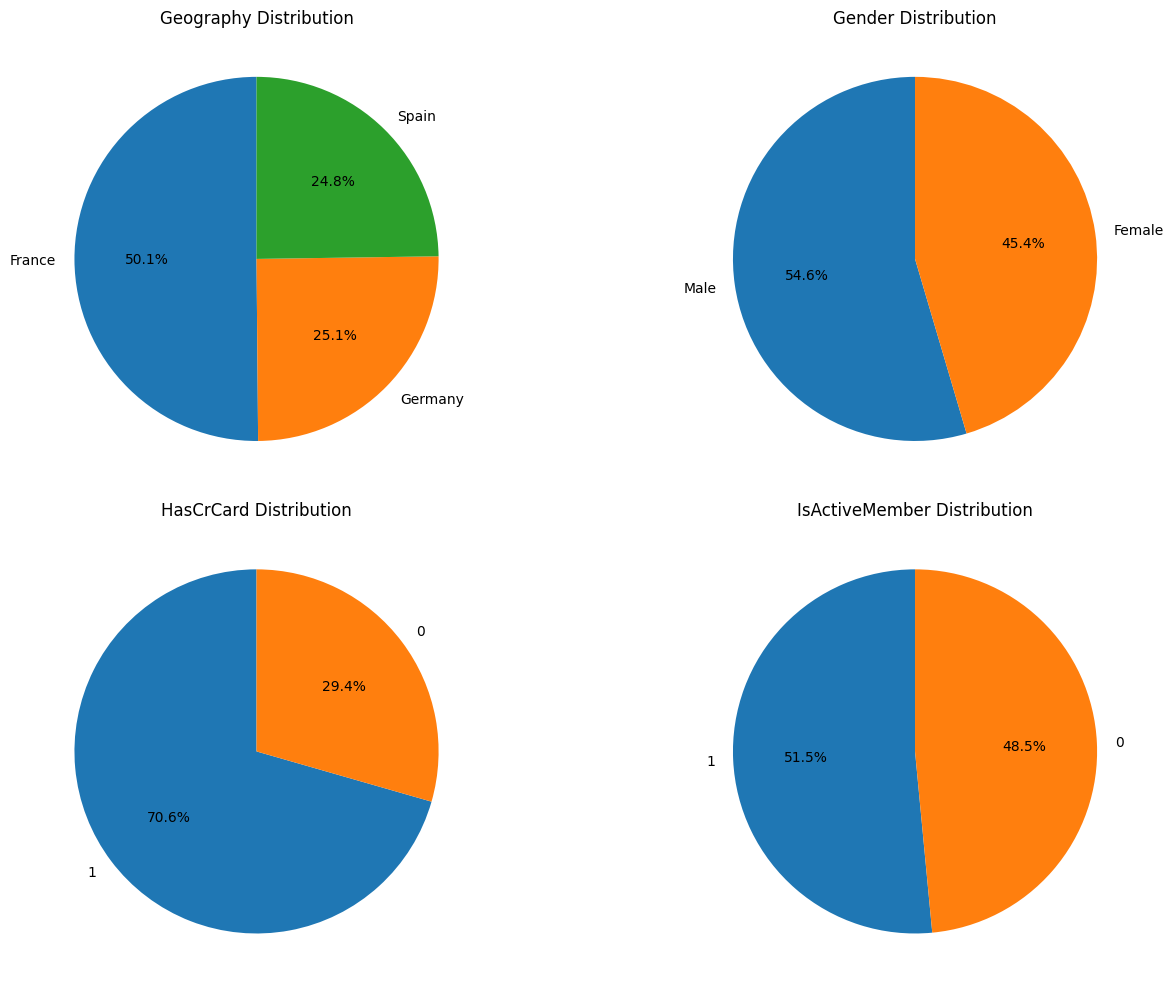

In [22]:
cat_obj = ['Geography','Gender','HasCrCard','IsActiveMember']
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
for i,var in enumerate(cat_obj):
    if i<len(axs.flat):
        obj_cont = df[var].value_counts()
        axs.flat[i].pie(obj_cont,labels=obj_cont.index,autopct="%1.1f%%",startangle=90)
        axs.flat[i].set_title(f'{var} Distribution')
plt.tight_layout()
plt.show()    

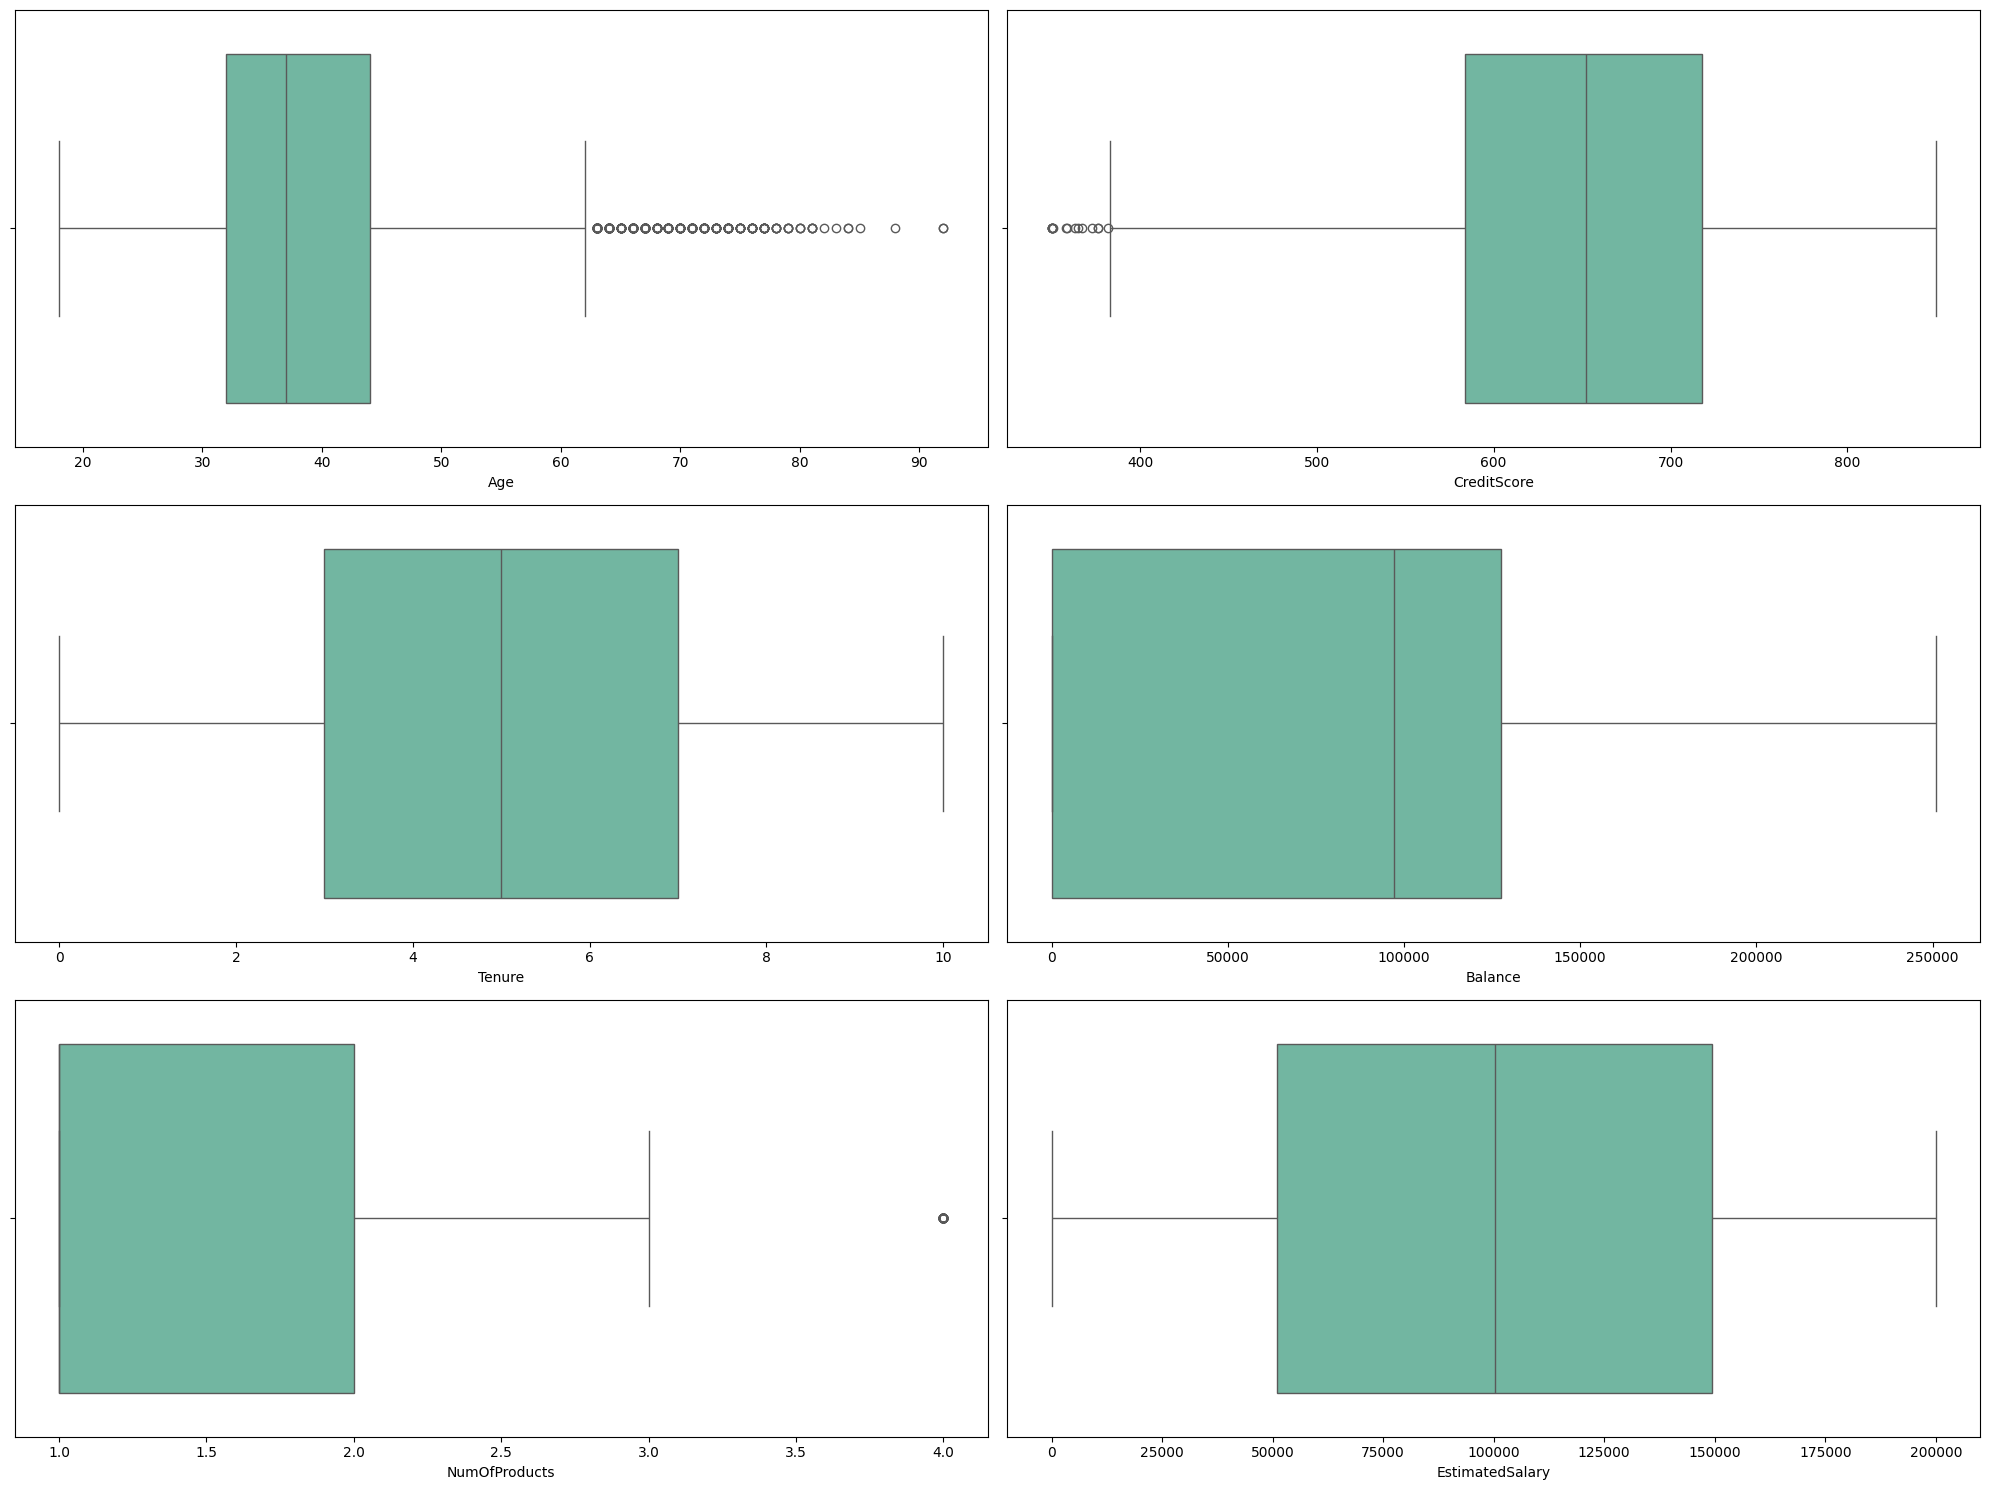

In [23]:
num = ['Age','CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary']
fig,axs = plt.subplots(nrows=3,ncols=2,figsize=(20,15))
axs=axs.flatten()

for i,var in enumerate(num):
    sns.boxplot(data=df,x=var,ax=axs[i],palette='Set2')
plt.tight_layout()
plt.show()

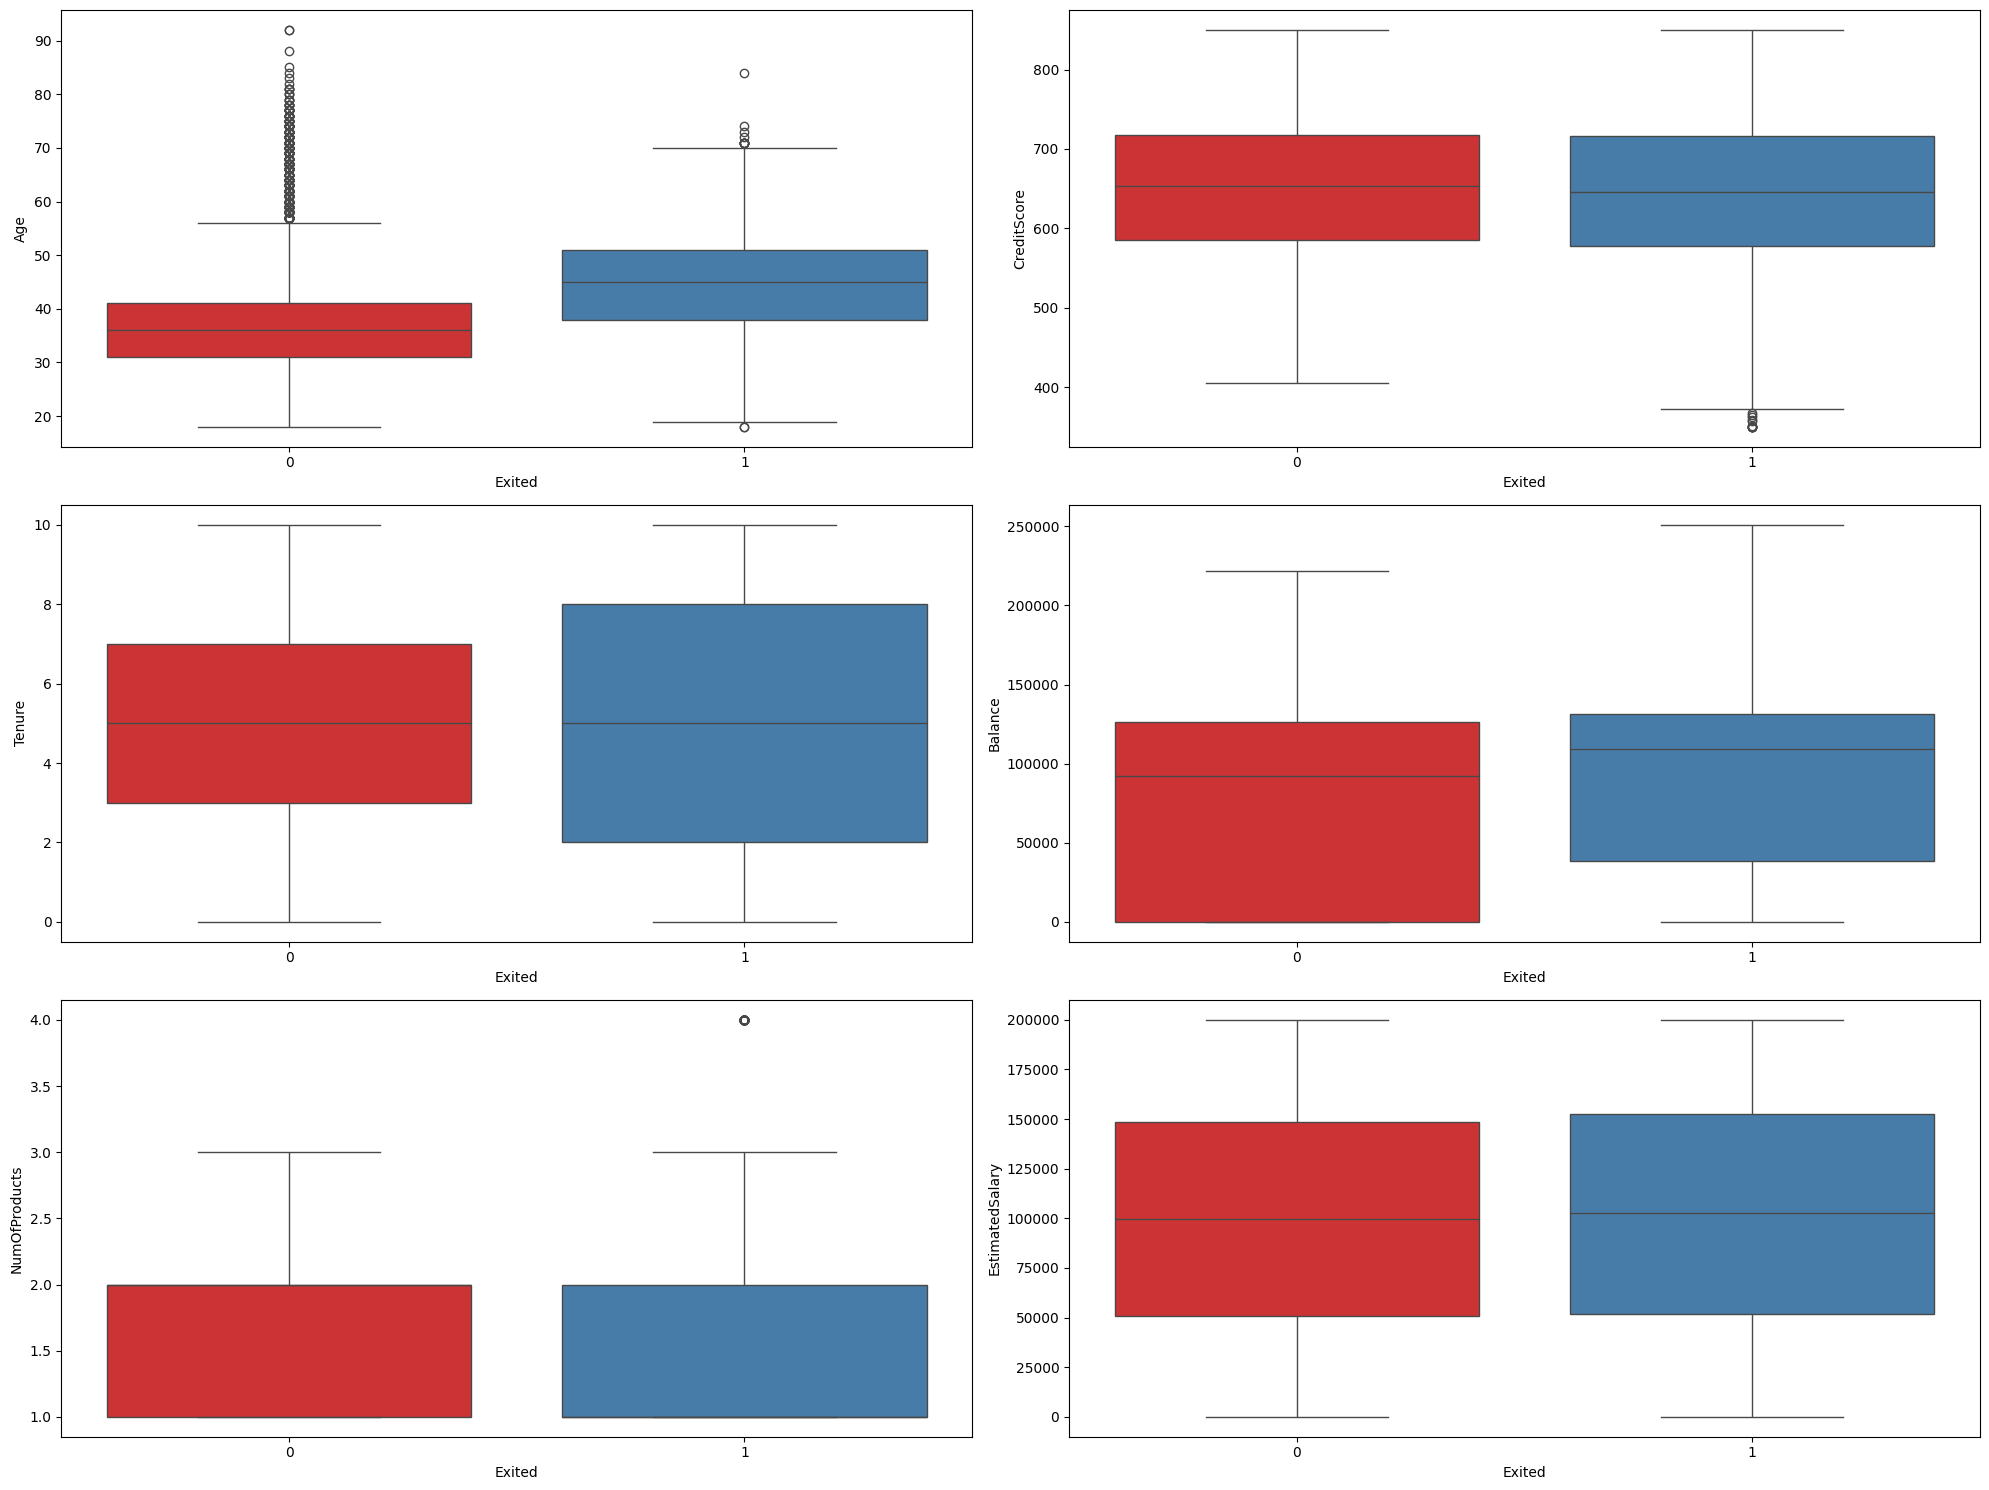

In [24]:
num1 = ['Age','CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary']
fig,axs = plt.subplots(nrows=3,ncols=2,figsize=(20,15))
axs=axs.flatten()

for i,var in enumerate(num):
    sns.boxplot(data=df,y=var,x='Exited',ax=axs[i],palette='Set1')
plt.tight_layout()
plt.show()

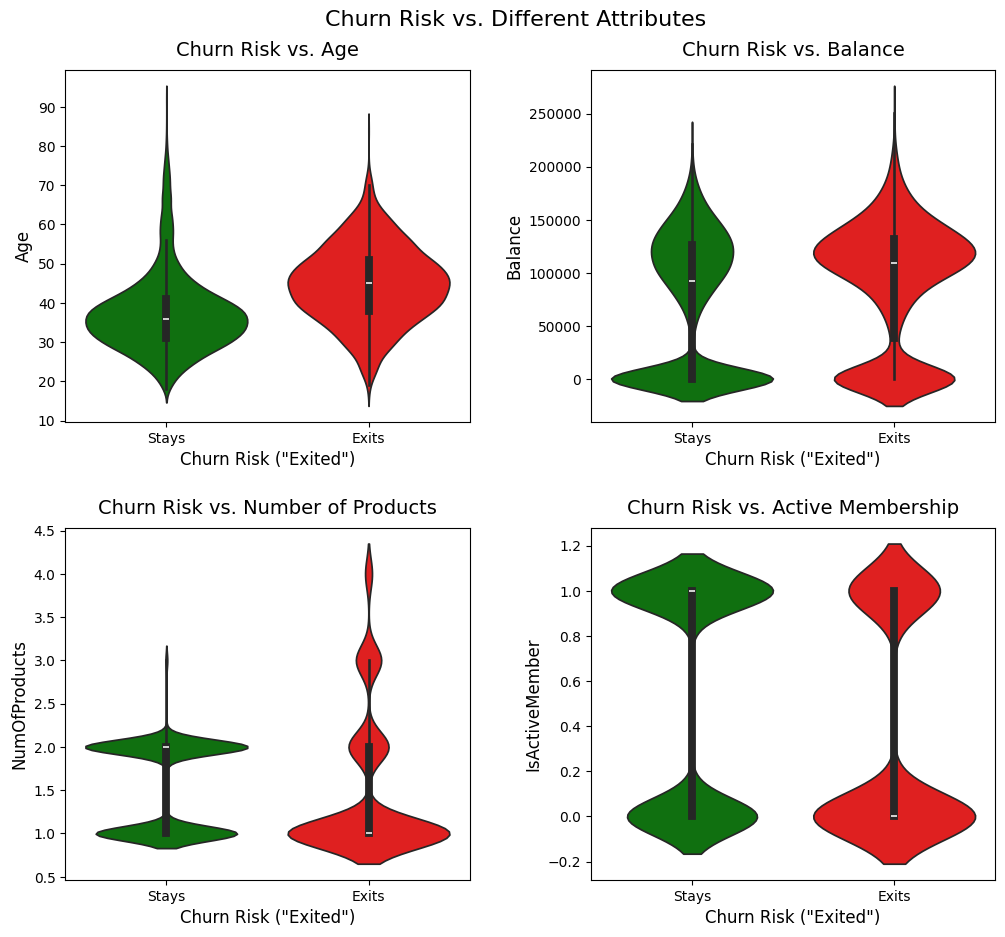

In [25]:
cls = {'Stays': 'green', 'Exits': 'red'}
# Convert to categorical
hr = {0: 'Stays', 1: 'Exits'}
churn = df['Exited'].map(hr)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Churn Risk vs. Different Attributes', fontsize=16)
fig.subplots_adjust(top=0.92, wspace=0.3, hspace=0.3)

sns.violinplot(x=churn,
               y=df['Age'],
               order=['Stays', 'Exits'], 
               palette=cls,
               ax=ax1)

ax1.set_title('Churn Risk vs. Age', fontsize=14, pad=10)
ax1.set_ylabel('Age',size=12)
ax1.set_xlabel('Churn Risk ("Exited")', size=12)

sns.violinplot(x=churn,
               y=df['Balance'],
               order=['Stays', 'Exits'], 
               palette=cls,
               ax=ax2)

ax2.set_title('Churn Risk vs. Balance', fontsize=14, pad=10)
ax2.set_ylabel('Balance',size=12)
ax2.set_xlabel('Churn Risk ("Exited")', size=12)

sns.violinplot(x=churn,
               y=df['NumOfProducts'],
               order=['Stays', 'Exits'], 
               palette=cls,
               ax=ax3)

ax3.set_title('Churn Risk vs. Number of Products', fontsize=14, pad=10)
ax3.set_ylabel('NumOfProducts',size=12)
ax3.set_xlabel('Churn Risk ("Exited")', size=12)

sns.violinplot(x=churn,
               y=df['IsActiveMember'],
               order=['Stays', 'Exits'], 
               palette=cls,
               ax=ax4)

ax4.set_title('Churn Risk vs. Active Membership', fontsize=14, pad=10)
ax4.set_ylabel('IsActiveMember',size=12)
ax4.set_xlabel('Churn Risk ("Exited")', size=12)
plt.show()

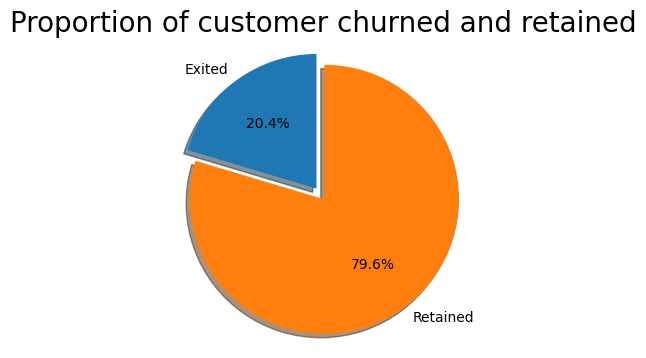

In [26]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(7, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [27]:
X = df.drop(['Exited'],axis=1)
Y = df['Exited']

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), [1, 2])],
    remainder='passthrough')

rfc = RandomForestClassifier(max_depth= 8, max_features= 9, min_samples_split= 6, n_estimators= 100, class_weight='balanced')

In [30]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('pre', transformer),
    ('algo', rfc)
])

In [31]:
pipe.fit(X_train, Y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 2])])),
                ('algo',
                 RandomForestClassifier(class_weight='balanced', max_depth=8,
                                        max_features=9, min_samples_split=6))])

In [32]:
y_pred = pipe.predict(X_test)
print(y_pred)

[0 0 0 ... 1 0 1]


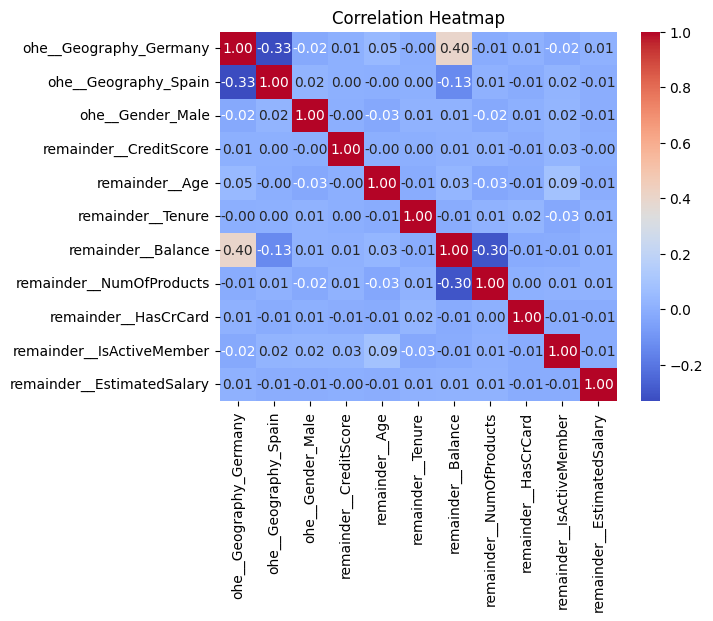

In [43]:
X_transformed = transformer.transform(X)
column_names = transformer.get_feature_names_out()
X_transformed_df = pd.DataFrame(X_transformed, columns=column_names)

# Calculate correlation matrix
correlation_matrix = X_transformed_df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [34]:
print("Accuracy_score :", round(accuracy_score(Y_test,y_pred)*100,2),"%")

Accuracy_score : 82.1 %


In [35]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1607
           1       0.53      0.74      0.62       393

    accuracy                           0.82      2000
   macro avg       0.73      0.79      0.75      2000
weighted avg       0.85      0.82      0.83      2000



In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,y_pred))

[[1351  256]
 [ 102  291]]


Text(0.5, 1.0, 'CONFUSION MATRIX FOR RANDOM FOREST CLASSIFIER')

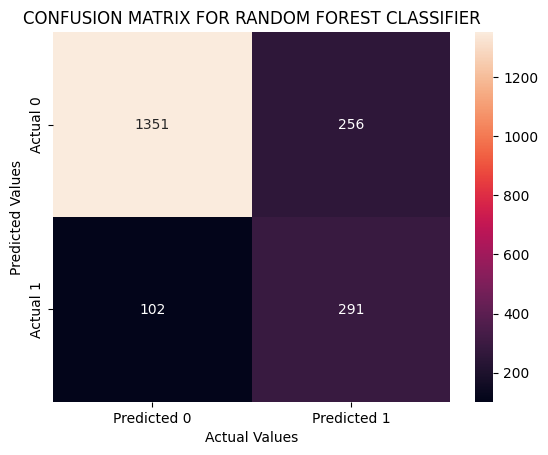

In [37]:
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True,fmt='d', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('CONFUSION MATRIX FOR RANDOM FOREST CLASSIFIER')

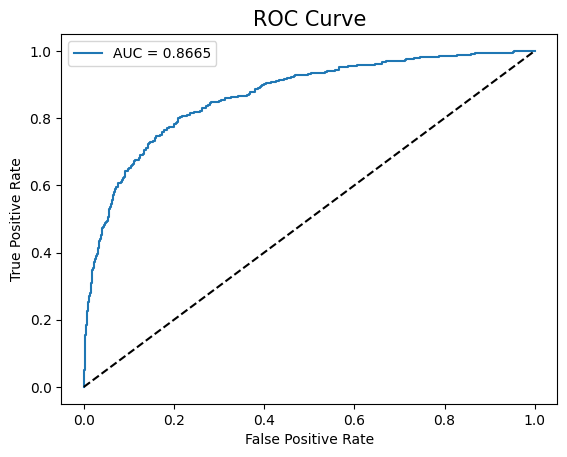

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
Y_pred = pipe.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(Y_test), columns=['Y_actual']), pd.DataFrame(Y_pred, columns=['Y_pred'])], axis=1)
df_actual_predicted.index = Y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['Y_actual'], df_actual_predicted['Y_pred'])
auc = roc_auc_score(df_actual_predicted['Y_actual'], df_actual_predicted['Y_pred'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [42]:
input_values = [[619,0,0,42,2,0,1,1,1,101348.90]]
prediction = pipe.predict(input_values)
print(prediction) 

[1]


In [40]:
import pickle
filename = 'pipe_model.sav'
pickle.dump(pipe,open(filename,'wb'))

In [41]:
model = pickle.load(open('pipe_model.sav','rb'))